# Определение лучшего тарифа для телеком-компании
Коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.  Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

Изучим основную информацию о данных:

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users =  pd.read_csv('/datasets/users.csv')

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [9]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [15]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропуски в столбцах отсутствуют, но существуют не верные типы данных которые нужно исправить, а в таблице 'internet' двойная индексация строк которую нужно исправить.

## Предобработка данных

Исправим типы данных и двойную индексацию строк в таблице 'internet':

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

In [18]:
internet = internet[['id','mb_used','session_date','user_id']]

In [19]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Округлим каждый звонок отдельно: даже если звонок длился всего 1 секунду, он будет засчитан как 1 минута:

In [20]:
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))

In [21]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [23]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [24]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Тип данных указывающих даты исправлен.

## Рассчет дополнительных характеристик

### Количество звонков и израсходованных минут по месяцам

In [26]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [27]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
calls_pivot.columns = ['sum_duration_call', 'count_call']
calls_pivot.head(15)

sum_duration_call  count_call
user_id month                               
1000    5                    159          22
        6                    172          43
        7                    340          47
        8                    408          52
        9                    466          58
        10                   350          57
        11                   338          43
        12                   333          46
1001    11                   430          59
        12                   414          63
1002    6                    117          15
        7                    214          26
        8                    289          42
        9                    206          36
        10                   212          33

### Количество отправленных сообщений по месяцам

In [28]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [29]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_pivot.columns = ['count_messages']
messages_pivot.head(15)

count_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11
        8                  13
        9                   4
        10                 10
        11                 16
        12                 12

### Объем израсходованного интернет-трафика по месяцам

In [30]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [31]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_pivot.columns = ['sum_mb']
internet_pivot.head(15)

sum_mb
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25

Округлим полученные значения до целых Гб в бОльшую сторону по правилам тарифа:

In [32]:
internet_pivot['sum_mb'] = (internet_pivot['sum_mb'] / 1024).apply(lambda x: math.ceil(x))*1024
internet_pivot.head(15)

sum_mb
user_id month        
1000    5        3072
        6       23552
        7       14336
        8       14336
        9       15360
        10      15360
        11      15360
        12      10240
1001    11      18432
        12      14336
1002    6       11264
        7       18432
        8       20480
        9       17408
        10      14336

### Помесячная выручка с каждого пользователя

In [33]:
user_revenue = calls_pivot.join([messages_pivot, internet_pivot], how='outer')
user_revenue.head()

sum_duration_call  count_call  count_messages   sum_mb
user_id month                                                        
1000    5                  159.0        22.0            22.0   3072.0
        6                  172.0        43.0            60.0  23552.0
        7                  340.0        47.0            75.0  14336.0
        8                  408.0        52.0            81.0  14336.0
        9                  466.0        58.0            57.0  15360.0

In [34]:
user_revenue = user_revenue.fillna(0)
user_revenue['count_call'] = user_revenue['count_call'].astype(int)
user_revenue['count_messages'] = user_revenue['count_messages'].astype(int)
user_revenue.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sum_duration_call  3214 non-null   float64
 1   count_call         3214 non-null   int64  
 2   count_messages     3214 non-null   int64  
 3   sum_mb             3214 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 130.4 KB


In [35]:
user_revenue = user_revenue.reset_index()
user_revenue.head(15)

,user_id,month,sum_duration_call,count_call,count_messages,sum_mb
0,1000,5,159.0,22,22,3072.0
1,1000,6,172.0,43,60,23552.0
2,1000,7,340.0,47,75,14336.0
3,1000,8,408.0,52,81,14336.0
4,1000,9,466.0,58,57,15360.0
5,1000,10,350.0,57,73,15360.0
6,1000,11,338.0,43,58,15360.0
7,1000,12,333.0,46,70,10240.0
8,1001,11,430.0,59,0,18432.0
9,1001,12,414.0,63,0,14336.0


In [36]:
user_revenue = user_revenue.merge(users, on='user_id')
user_revenue = user_revenue[['user_id','month','sum_duration_call','count_call','count_messages','sum_mb','city','tariff']]
user_revenue.columns = ['user_id','month','sum_duration_call','count_call','count_messages','sum_mb','city','tariff_name']
user_revenue.head(15)

,user_id,month,sum_duration_call,count_call,count_messages,sum_mb,city,tariff_name
0,1000,5,159.0,22,22,3072.0,Краснодар,ultra
1,1000,6,172.0,43,60,23552.0,Краснодар,ultra
2,1000,7,340.0,47,75,14336.0,Краснодар,ultra
3,1000,8,408.0,52,81,14336.0,Краснодар,ultra
4,1000,9,466.0,58,57,15360.0,Краснодар,ultra
5,1000,10,350.0,57,73,15360.0,Краснодар,ultra
6,1000,11,338.0,43,58,15360.0,Краснодар,ultra
7,1000,12,333.0,46,70,10240.0,Краснодар,ultra
8,1001,11,430.0,59,0,18432.0,Москва,smart
9,1001,12,414.0,63,0,14336.0,Москва,smart


In [37]:
user_revenue = user_revenue.merge(tariffs, on='tariff_name', how='left')
user_revenue = user_revenue[['user_id','month','sum_duration_call','count_call','count_messages','sum_mb','city','tariff_name', 'messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute']]
user_revenue.head()

,user_id,month,sum_duration_call,count_call,count_messages,sum_mb,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22,22,3072.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43,60,23552.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47,75,14336.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52,81,14336.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58,57,15360.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [38]:
user_revenue['revenue'] = user_revenue['rub_monthly_fee']
user_revenue.loc[user_revenue['sum_duration_call'] - user_revenue['minutes_included'] > 0, ['revenue']] = user_revenue['revenue'] + (user_revenue['sum_duration_call'] - user_revenue['minutes_included'])*user_revenue['rub_per_minute']
user_revenue.loc[user_revenue['count_messages'] - user_revenue['messages_included'] > 0, ['revenue']] = user_revenue['revenue'] + (user_revenue['count_messages'] - user_revenue['messages_included'])*user_revenue['rub_per_message']
user_revenue.loc[user_revenue['sum_mb'] - user_revenue['mb_per_month_included'] > 0, ['revenue']] = user_revenue['revenue'] + (user_revenue['sum_mb'] - user_revenue['mb_per_month_included'])*user_revenue['rub_per_gb']/1024

In [39]:
user_revenue = user_revenue[['user_id','month','sum_duration_call','count_call','count_messages','sum_mb','city','tariff_name', 'revenue']]
user_revenue.head(15)

,user_id,month,sum_duration_call,count_call,count_messages,sum_mb,city,tariff_name,revenue
0,1000,5,159.0,22,22,3072.0,Краснодар,ultra,1950.0
1,1000,6,172.0,43,60,23552.0,Краснодар,ultra,1950.0
2,1000,7,340.0,47,75,14336.0,Краснодар,ultra,1950.0
3,1000,8,408.0,52,81,14336.0,Краснодар,ultra,1950.0
4,1000,9,466.0,58,57,15360.0,Краснодар,ultra,1950.0
5,1000,10,350.0,57,73,15360.0,Краснодар,ultra,1950.0
6,1000,11,338.0,43,58,15360.0,Краснодар,ultra,1950.0
7,1000,12,333.0,46,70,10240.0,Краснодар,ultra,1950.0
8,1001,11,430.0,59,0,18432.0,Москва,smart,1150.0
9,1001,12,414.0,63,0,14336.0,Москва,smart,550.0


Дополнительные данные рассчитаны.

## Анализ данных

Опишем поведение клиентов оператора исходя из выборки. Рассчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

### Тариф ULTRA

#### Месяная длительность звонков

In [40]:
user_revenue[user_revenue['tariff_name'] =='ultra']['sum_duration_call'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: sum_duration_call, dtype: float64

In [41]:
np.var(user_revenue[user_revenue['tariff_name'] =='ultra']['sum_duration_call'])

100771.2236172022

<AxesSubplot:>

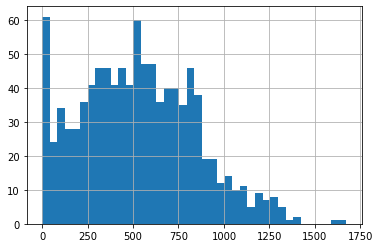

In [42]:
user_revenue[user_revenue['tariff_name'] =='ultra']['sum_duration_call'].hist(bins=40)

<AxesSubplot:>

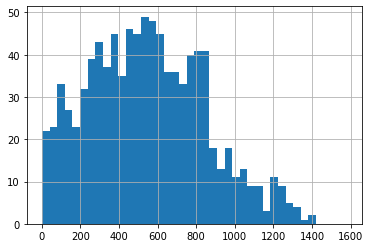

In [43]:
user_revenue[user_revenue['tariff_name'] =='ultra']['sum_duration_call'].hist(bins=40, range=(1, 1578.06))

В среднем пользователи тарифа говорят 526 минут в месяц. Гистограмма показывает что существует довольно большое количество пользователей которые не пользуются услугами связи целый месяц. При этом, в пакете тарифа предусмотрено 3000 минут, однако, ни один из пользователей не использовал его полностью, максимальное время составило 1673 минут в месяц, скорее всего количество минут предусмотренных тарифом избыточно.

#### Месяное количество сообщений

In [44]:
user_revenue[user_revenue['tariff_name'] =='ultra']['count_messages'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: count_messages, dtype: float64

In [45]:
np.var(user_revenue[user_revenue['tariff_name'] =='ultra']['count_messages'])

2282.9460753948824

<AxesSubplot:>

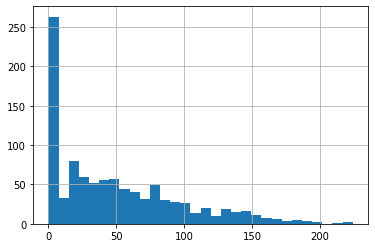

In [46]:
user_revenue[user_revenue['tariff_name'] =='ultra']['count_messages'].hist(bins=30)

<AxesSubplot:>

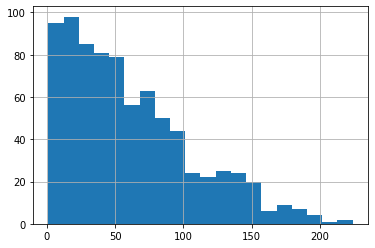

In [47]:
user_revenue[user_revenue['tariff_name'] =='ultra']['count_messages'].hist(bins=20, range=(1, 224))

В среднем пользователи тарифа отправляют 49 сообщений в месяц. Гистограмма показывает что существует довольно большое количество пользователей которые не отправляют сообщения целый месяц. При этом, в пакете тарифа предусмотрено 1000 сообщений, однако, ни один из пользователей не использовал его полностью, максимальное количество составило 224 сообщения в месяц, скорее всего количество сообщений предусмотренных тарифом избыточно. Гистограмма стремится к распределению Пуассона.

#### Месяный объем интернет-трафика

In [48]:
user_revenue[user_revenue['tariff_name'] =='ultra']['sum_mb'].describe()

count      985.000000
mean     19962.282234
std      10089.995640
min          0.000000
25%      12288.000000
50%      19456.000000
75%      27648.000000
max      50176.000000
Name: sum_mb, dtype: float64

In [49]:
np.var(user_revenue[user_revenue['tariff_name'] =='ultra']['sum_mb'])

101704653.63404985

<AxesSubplot:>

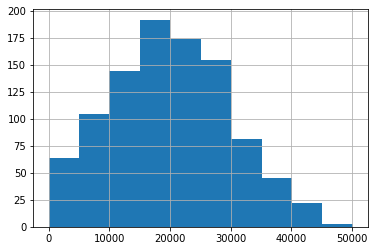

In [50]:
user_revenue[user_revenue['tariff_name'] =='ultra']['sum_mb'].hist(bins=10)

В среднем пользователи тарифа используют 19962 Мб трафика в месяц. В пакете тарифа предусмотрено 30720 Мб трафика, и исходя из гистограммы можно сказать что более чем 75% пользователей такой объем устраивает.

Вывод:

Исходя из анализа использования тарифа пользователями можно сделать вывод что тариф ULTRA используется из-за большого количества интернет-трафика в нём, предоставленный пакет трафика используется полностью, а вот сообщения и звонки остаются не востребованными и объем пакетов предусмотренных тарифом завышен.

### Тариф SMART

#### Месяная длительность звонков

In [51]:
user_revenue[user_revenue['tariff_name'] =='smart']['sum_duration_call'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: sum_duration_call, dtype: float64

In [52]:
np.var(user_revenue[user_revenue['tariff_name']=='smart']['sum_duration_call'])

36203.06665209469

<AxesSubplot:>

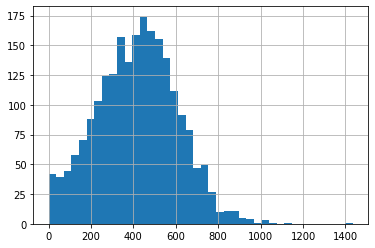

In [53]:
user_revenue[user_revenue['tariff_name']=='smart']['sum_duration_call'].hist(bins=40)

В среднем пользователи тарифа говорят 418 минут в месяц. При этом количество пользователей не использующих услуги связи не велико.

#### Месяное количество сообщений

In [54]:
user_revenue[user_revenue['tariff_name'] =='smart']['count_messages'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: count_messages, dtype: float64

In [55]:
np.var(user_revenue[user_revenue['tariff_name'] =='smart']['count_messages'])

796.455482917076

<AxesSubplot:>

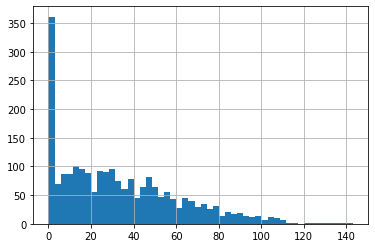

In [56]:
user_revenue[user_revenue['tariff_name'] =='smart']['count_messages'].hist(bins=50)

<AxesSubplot:>

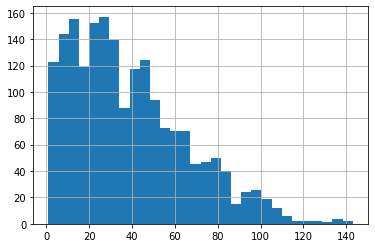

In [57]:
user_revenue[user_revenue['tariff_name'] =='smart']['count_messages'].hist(bins=30, range=(1, 143))

В среднем пользователи тарифа отправляют 33 сообщения в месяц. Гистограмма показывает что существует довольно большое количество пользователей которые не отправляют сообщения целый месяц. При этом, в пакете тарифа предусмотрено 50 сообщений, и такого объема хватает 75% пользователей. Гистограмма стремится к распределению Пуассона.

#### Месяный объем интернет-трафика

In [58]:
user_revenue[user_revenue['tariff_name'] =='smart']['sum_mb'].describe()

count     2229.000000
mean     16720.739345
std       5884.990022
min          0.000000
25%      13312.000000
50%      17408.000000
75%      20480.000000
max      38912.000000
Name: sum_mb, dtype: float64

In [59]:
np.var(user_revenue[user_revenue['tariff_name'] =='smart']['sum_mb'])

34617570.05184363

<AxesSubplot:>

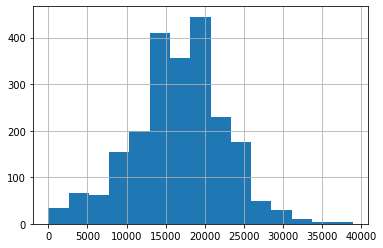

In [60]:
user_revenue[user_revenue['tariff_name'] =='smart']['sum_mb'].hist(bins=15)

В среднем пользователи тарифа используют 16720 Мб трафика в месяц. В пакете тарифа предусмотрено 15360 Мб трафика, и исходя из гистограммы можно сказать что почти половину пользователей такой объем устраивает.

Вывод:

Исходя из анализа использования тарифа пользователями можно сделать вывод что тариф SMART используется не только для использования интернет-трафика, но и для связи и звонков.

In [61]:
# код ревьюера
user_revenue.pivot_table(index = 'tariff_name', values = ['sum_duration_call', 'sum_mb', 'count_messages'],
                            aggfunc = ['var', 'std', 'mean'])

var                                            std  \
            count_messages sum_duration_call        sum_mb count_messages   
tariff_name                                                                 
smart           796.812958      36219.315784  3.463311e+07      28.227876   
ultra          2285.266143     100873.633397  1.018080e+08      47.804457   

                                                      mean                    \
            sum_duration_call        sum_mb count_messages sum_duration_call   
tariff_name                                                                    
smart              190.313730   5884.990022      33.384029        417.934948   
ultra              317.606098  10089.995640      49.363452        526.623350   

                           
                   sum_mb  
tariff_name                
smart        16720.739345  
ultra        19962.282234

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы

Выдвинем гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы и проверим её:

Н0 - гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы;

H1 - гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» разные.

In [62]:
user_revenue[user_revenue['tariff_name'] == 'ultra']['revenue'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

In [63]:
user_revenue[user_revenue['tariff_name'] == 'smart']['revenue'].describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64

In [64]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

In [65]:
results = st.ttest_ind(
    user_revenue[user_revenue['tariff_name'] == 'ultra']['revenue'], 
    user_revenue[user_revenue['tariff_name'] == 'smart']['revenue'],
    equal_var = False)

In [66]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Гипотезу о том, что средняя выручка пользователей на двух разных тарифах одинакова отвергаем в пользу альтернативной.

### Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Выдвинем гипотезу, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов и проверим её:

Н0 - гипотеза о том, что средняя выручка пользователей из Москвы и из других регионов одинаковы;

H1 - гипотеза о том, что средняя выручка пользователей из Москвы и из других регионов разные.

In [67]:
user_revenue[user_revenue['city'] == 'Москва']['revenue'].describe()

count     611.000000
mean     1546.713584
std       752.088071
min       550.000000
25%       780.500000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: revenue, dtype: float64

In [68]:
user_revenue[user_revenue['city'] != 'Москва']['revenue'].describe()

count    2603.000000
mean     1524.936227
std       808.787752
min       550.000000
25%       750.000000
50%      1583.000000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

In [69]:
results = st.ttest_ind(
    user_revenue[user_revenue['city'] == 'Москва']['revenue'], 
    user_revenue[user_revenue['city'] != 'Москва']['revenue'])

In [70]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу о том, что средняя выручка в Москве и других городах одинаковая отвергнуть не получилось.

### Средняя выручка пользователей тарифа «Ультра» выше тарифа «Смарт»

Н0 - гипотеза о том, что средняя выручка пользователей тарифа «Ультра» не отличается от тарифа «Смарт»;

H1 - гипотеза о том, что средняя выручка пользователей тарифа «Ультра» выше тарифа «Смарт».

In [71]:
alpha = .05 # критический уровень статистической значимости

In [72]:
mean_ultra = user_revenue[user_revenue['tariff_name'] == 'ultra']['revenue'].mean()

In [73]:
results = st.ttest_1samp(
    user_revenue[user_revenue['tariff_name'] == 'smart']['revenue'], 
    mean_ultra)

In [74]:
print('p-значение:', results.pvalue / 2)

# отвергаем гипотезу только тогда, когда выборочное среднее значимо меньше предполагаемого значения
if (results.pvalue / 2 < alpha) and (mean_ultra > user_revenue[user_revenue['tariff_name'] == 'smart']['revenue'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

p-значение: 1.681759983e-315
Отвергаем нулевую гипотезу


Гипотезу о том, что средняя выручка пользователей тарифа «Ультра» не отличается для тарифа «Смарт» отвергаем в пользу альтернативной.

In [75]:
user_revenue[user_revenue['tariff_name'] == 'ultra']['revenue'].describe()

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: revenue, dtype: float64

In [76]:
user_revenue[user_revenue['tariff_name'] == 'smart']['revenue'].describe()

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: revenue, dtype: float64

## Выводы

- В процессе исследования были исправлены типы данных в таблицах, округлено количество минут и интернет трафика согласно правилам тарифа, были рассчитаны помесячные данные использования сообщений, минут и трафика;
- Было выявлено что сообщения не пользуются популярностью ни на одном из тарифов, а тариф ULTRA используется в осномном ради интернет-трафика, количество сообщений и минут в этом тарифе избыточно, пользователи их не используют;
- Тариф SMART используется оптимально с точки зрения пакетов минут и смс, а количество трафика скорее недостаточно для пользователей;
- Cредняя выручка пользователей между тарифами разная, выручка выше у тарифа «Ультра»;
- Средняя выручка в Москве не отличается от других регионов

Средняя выручка тарифа «Ультра» выше чем у тарифа «Смарт» в расчете на пользователя, однако, назвать только из-за этого данный тариф лучшим было бы не верно, но считать его перспективным можно.
Данные тарифы можно было бы улучшить: для тарифа «Смарт» немного увеличить количество трафика, а для тарифа «Ультра» уменьшить количество смс и минут, при уменьшении пакетов минут и смс цена тарифа снизится, а значит количество пользователей данного тарифа в перспективе должно увеличится из-за снижения цены. Чем больше пользователей - тем лучше для компании.